In [0]:
import os
import re

import numpy as np
from matplotlib import pyplot as plt

import skimage
import skimage.io
import skimage.filters

from tqdm.auto import tqdm
from IPython import display

In [14]:
from google.colab import drive
drive.mount('/content/drive')

dir_project = '/content/drive/My Drive/Stanford/2018-20 Coterm/CS 231N/Project'
dir_data = os.path.join(dir_project, 'sketchy_dataset')
dir_results = os.path.join(dir_project, 'results')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
dir_train = os.path.join(dir_data, 'sketch', 'tx_000100000000', 'airplane')
dir_test = os.path.join(dir_data, 'sketch', 'tx_000000000000', 'airplane')

In [0]:
def load(file_sketch):
  sketch = skimage.io.imread(file_sketch)
  
  file_photo = file_sketch.replace('/sketch/', '/photo/')
  file_photo = re.sub(r'-\d+\.png$', '.jpg', file_photo)
  photo = skimage.io.imread(file_photo)

  return photo, sketch

In [0]:
def edge(photo):
  tmp = skimage.filters.sobel(skimage.color.rgb2gray(photo))
  return tmp < skimage.filters.threshold_otsu(tmp)

In [0]:
d = []
n_pix_edge = []
n_pix_sketch = []
for file_sketch in os.listdir(dir_test):
  photo, sketch = load(os.path.join(dir_test, file_sketch))
  sketch = sketch.mean(axis=2) < 127.5
  edges = edge(photo)
  d.append(np.sum(np.logical_xor(edges, sketch)))
  n_pix_edge.append(edges.sum())
  n_pix_sketch.append(sketch.sum())

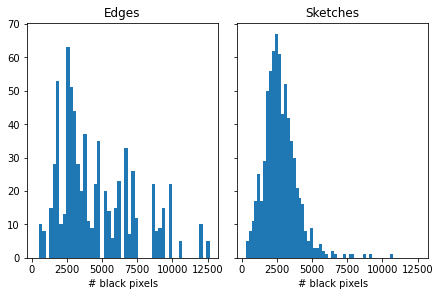

In [9]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, constrained_layout=True)
axs[0].hist(n_pix_edge, bins=50)
axs[0].set(xlabel='# black pixels', title='Edges')
axs[1].hist(n_pix_sketch, bins=50)
axs[1].set(xlabel='# black pixels', title='Sketches')
# fig.savefig(os.path.join(dir_results, 'n_black_pixels_edges.png'))
plt.show()

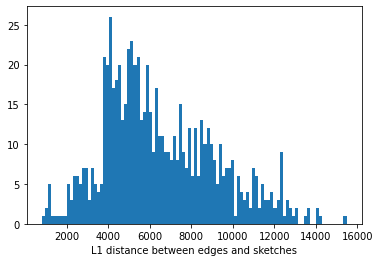

In [10]:
fig, ax = plt.subplots()
ax.hist(d, bins=100)
ax.set_xlabel('L1 distance between edges and sketches')
# fig.savefig(os.path.join(dir_results, 'L1_dist_edges.png'))
plt.show()

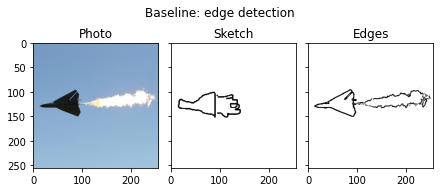

In [27]:
file_sketch = 'n02691156_9966-1.png'
photo, sketch = load(os.path.join(dir_test, file_sketch))
sketch = sketch.mean(axis=2) > 127.5
edges = edge(photo)

fig, axs = plt.subplots(1, 3, figsize=(6, 2.5), sharex=True, sharey=True, constrained_layout=True)
axs[0].imshow(photo)
axs[0].set_title('Photo')
axs[1].imshow(sketch, cmap='gray', vmin=0, vmax=1)
axs[1].set_title('Sketch')
axs[2].imshow(edges, cmap='gray', vmin=0, vmax=1)
axs[2].set_title('Edges')
fig.suptitle('Baseline: edge detection')
fig.savefig(os.path.join(dir_results, 'edge_detection_sample.png'), dpi=300)
plt.show()

In [30]:
256 * 256

65536